In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from sklearn.neighbors import KDTree

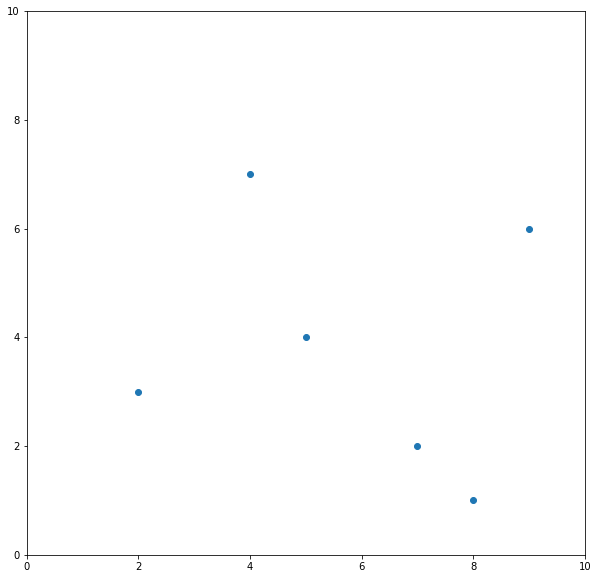

In [2]:
points = np.array([(2,3),
                   (4,7),
                   (5,4),
                   (7,2),
                   (8,1),
                   (9,6)])
point = np.array([[3,5]])
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [3]:
points.var(axis=0)

array([5.80555556, 4.47222222])

In [4]:
points[len(points)//2]

array([7, 2])

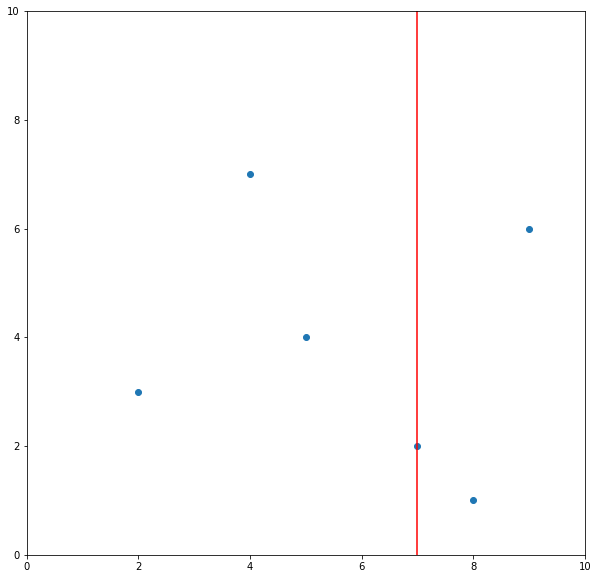

In [5]:
# x軸資料的變異較y軸資料大,所以初始劃分由x軸開始
# kd_tree所劃分的超平面垂直於座標軸
# 從中位點開始
# points[len(points)//2]
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

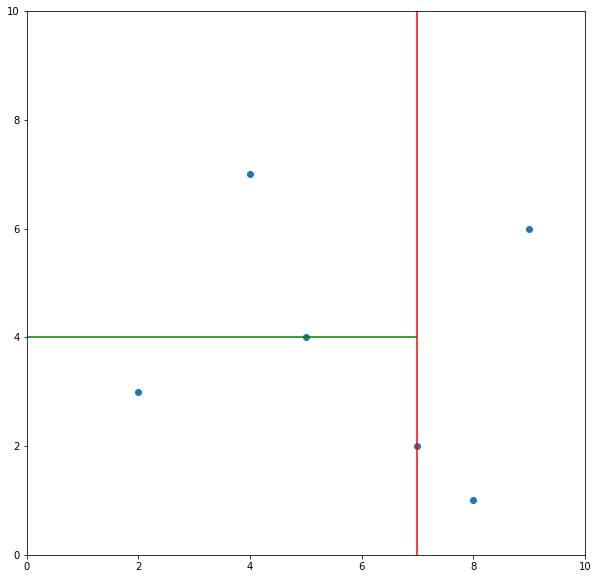

In [6]:
# 接著由y軸資料進行劃分(各個維度依變異樹由大到小,依序循環使用)
# kd_tree所劃分的超平面垂直於座標軸 
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.hlines(4,xmin=0,xmax=7,colors='g')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

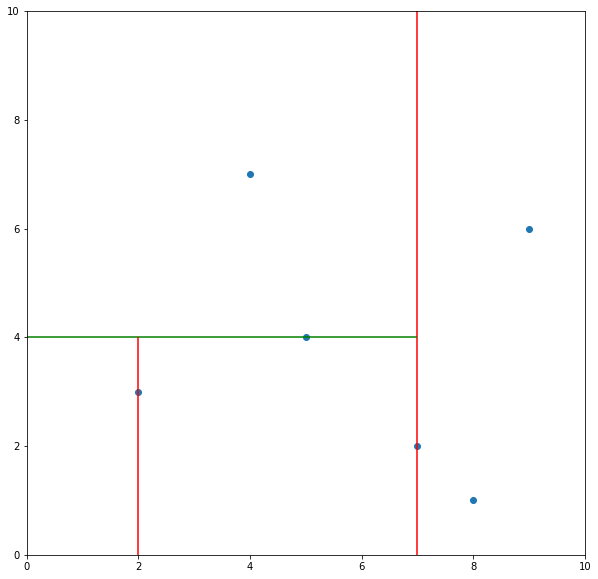

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.hlines(4,xmin=0,xmax=7,colors='g')
plt.vlines(2,ymin=0,ymax=4,color='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

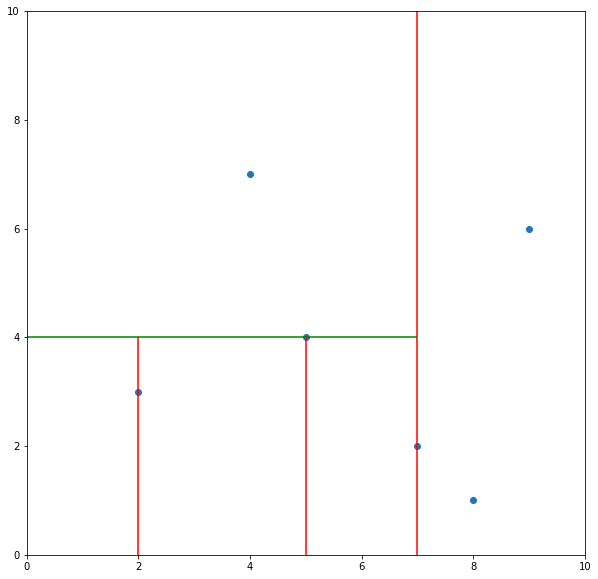

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.hlines(4,xmin=0,xmax=7,colors='g')
plt.vlines(2,ymin=0,ymax=4,color='r')
plt.vlines(5,ymin=0,ymax=4,color='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

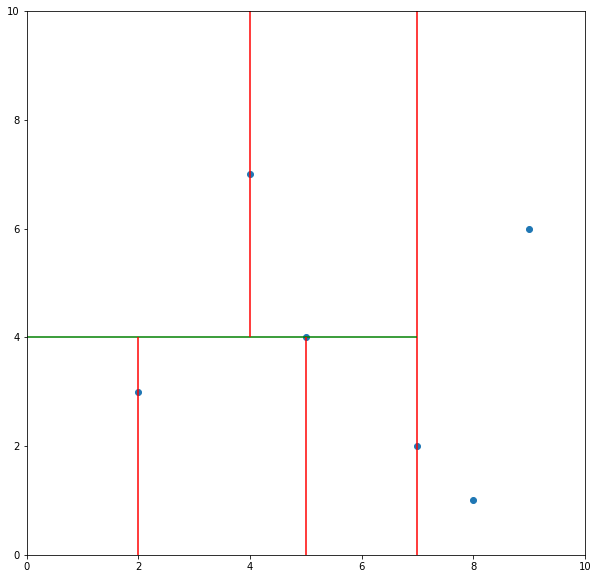

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.hlines(4,xmin=0,xmax=7,colors='g')
plt.vlines(2,ymin=0,ymax=4,color='r')
plt.vlines(5,ymin=0,ymax=4,color='r')
plt.vlines(4,ymin=4,ymax=10,color='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

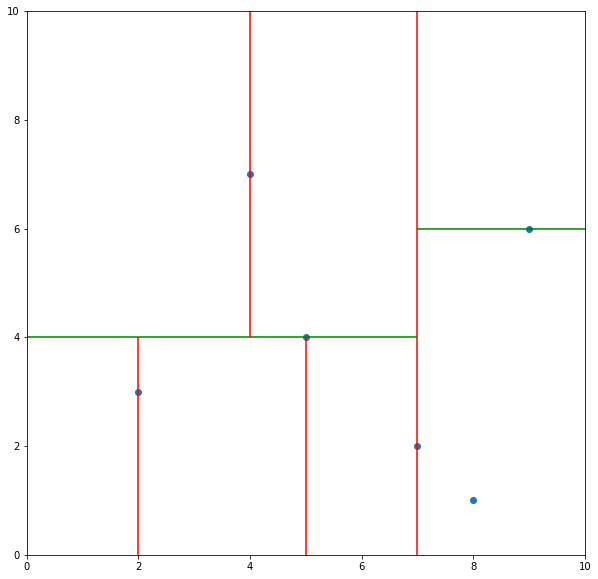

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.hlines(4,xmin=0,xmax=7,colors='g')
plt.vlines(2,ymin=0,ymax=4,color='r')
plt.vlines(5,ymin=0,ymax=4,color='r')
plt.vlines(4,ymin=4,ymax=10,color='r')
plt.hlines(6,xmin=7,xmax=10,color='g')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

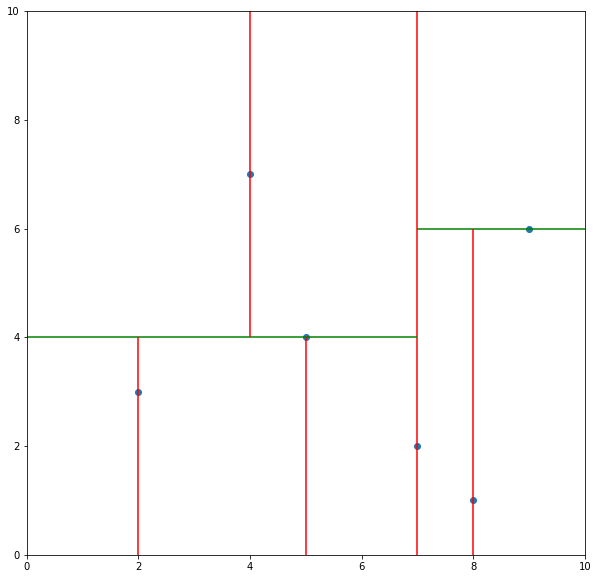

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.vlines(7,ymin=0,ymax=10,colors='r')
plt.hlines(4,xmin=0,xmax=7,colors='g')
plt.vlines(2,ymin=0,ymax=4,color='r')
plt.vlines(5,ymin=0,ymax=4,color='r')
plt.vlines(4,ymin=4,ymax=10,color='r')
plt.hlines(6,xmin=7,xmax=10,color='g')
plt.vlines(8,ymin=0,ymax=6,color='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [12]:
kdtree = KDTree(points)

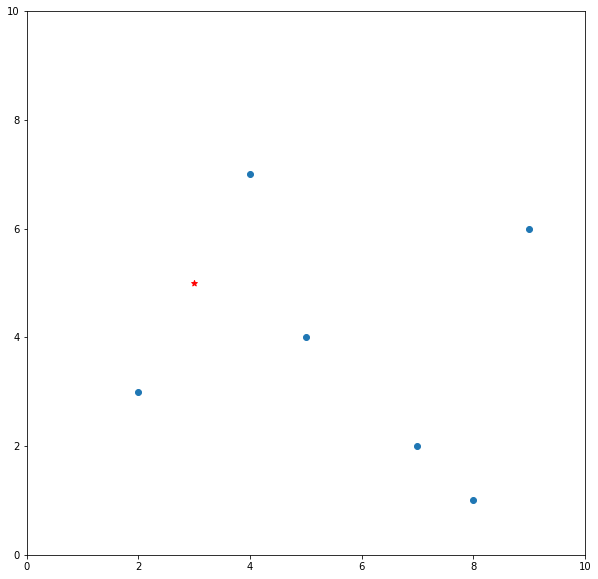

In [13]:
points = np.array([(2,3),(4,7),(5,4),(7,2),(8,1),(9,6)])
point = np.array([[3,5]])
plt.figure(figsize=(10,10))
plt.scatter(points[:,0],points[:,1])
plt.scatter(point[:,0],point[:,1],marker='*',c='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

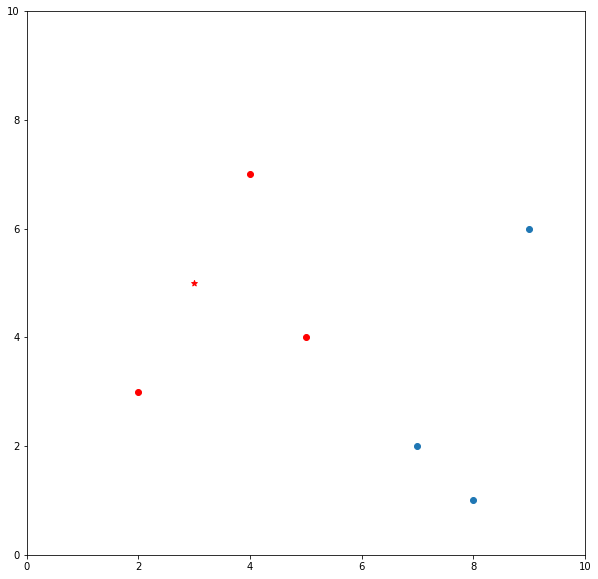

In [14]:
dists, indices = kdtree.query(point, k=3)
indices_k_mask = np.full(points.shape[0],False,dtype=bool)
indices_k_mask[indices[0,:]] = True

points_k = points[indices_k_mask]
points_not_k = points[~indices_k_mask]

plt.figure(figsize=(10,10))
plt.scatter(point[:,0],point[:,1],marker='*',c='r')
plt.scatter(points_k[:,0],points_k[:,1],c='r')
plt.scatter(points_not_k[:,0],points_not_k[:,1])

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

In [15]:
np.max(dists)

2.23606797749979

In [16]:
indices = kdtree.query_radius([[3,5]], r=np.max(dists))
print(indices)

[array([0, 1, 2], dtype=int64)]


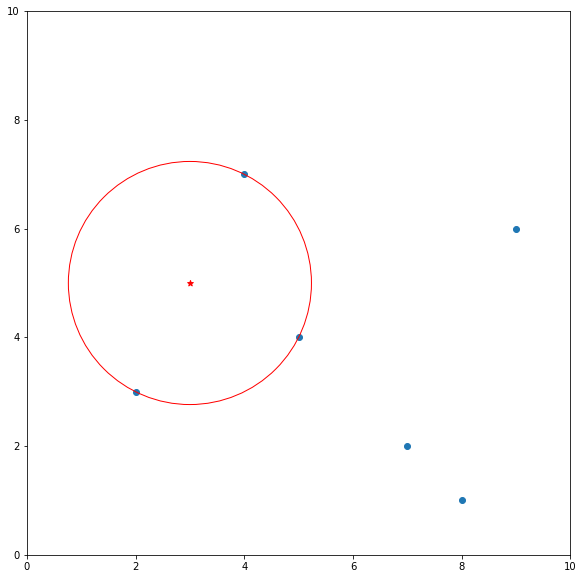

In [17]:
points = np.array([(2,3),(4,7),(5,4),(7,2),(8,1),(9,6)])
point = np.array([[3,5]])

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(Circle([3,5], np.max(dists), color='r', fill=False))
plt.scatter(points[:,0],points[:,1])
plt.scatter(point[:,0],point[:,1],marker='*',c='r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

[[0.         0.06703304 0.10907128]] [[ 0 68 11]]
[array([62,  1, 67, 68,  2, 53, 16, 18, 93, 22, 55,  0, 11], dtype=int64)]


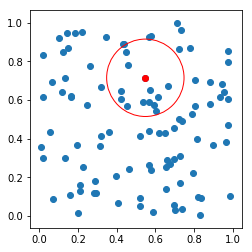

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from sklearn.neighbors import KDTree
np.random.seed(0)
points = np.random.random((100, 2))
tree = KDTree(points)
point = points[0]
# kNN
dists, indices = tree.query([point], k=3)
print(dists, indices)
# query radius
indices = tree.query_radius([point], r=0.2)
print(indices)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.add_patch(Circle(point, 0.2, color='r', fill=False))
X, Y = [p[0] for p in points], [p[1] for p in points]
plt.scatter(X, Y)
plt.scatter([point[0]], [point[1]], c='r')
plt.show()